In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

# 03/10/23 - Categorical Encoding
  It is of two types : 
   - Nominal
   - Order

In [46]:
train_df = pd.DataFrame({
    "product" : ['pen','pencil','pen','eraser','pencil','eraser']
})
train_df.head()

,product
0,pen
1,pencil
2,pen
3,eraser
4,pencil


## Ordinal Encoder
`Used to encode features`

In [53]:
encoders = ce.OrdinalEncoder(cols=['product'],return_df=True,mapping=[{'col':'product',
                                                                       'mapping' : {'eraser':0,'pencil':1,'pen':2}}])
df_train_tranform = encoders.fit_transform(train_df)
df_train_tranform

,product
0,2
1,1
2,2
3,0
4,1
5,0


## LabelEncoder
`Used to encode target`

In [58]:
encoder = LabelEncoder()
encoded_data = encoder.fit_transform(train_df)
train_df_encoded = pd.DataFrame(encoded_data,columns=train_df.columns)
train_df_encoded

c:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,product
0,1
1,2
2,1
3,0
4,2
5,0


## One hot encoding

In [60]:
encoder = ce.OneHotEncoder(cols='product',handle_unknown="return_nan",return_df=True,use_cat_names=True)

OneHotEncoder(cols='product', handle_unknown='return_nan', use_cat_names=True)

In [62]:
encoded_data = encoder.fit_transform(train_df)
encoded_data

,product_pen,product_pencil,product_eraser
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
5,0.0,0.0,1.0


## Dummy Encoding
`To avoid multi-collinearity`

In [68]:
data_encoded = pd.get_dummies(data=train_df,drop_first=True)
data_encoded

,product_pen,product_pencil
0,True,False
1,False,True
2,True,False
3,False,False
4,False,True
5,False,False


## 05/10/23 - Feature Scaling
`If a feature in the dataset is big in scale compared to other then in algorithms where Euclidean distance is measured this big scaled feature becomes dominating and needs to be normalized`<br>
<hr>

## Types of Feature Scaling :
 <b> Standardization : </b>
   
   - Standard Scaler
  
  <b> Normalization : </b>

   - Min Max Scaling

## Standardization
  Standardization is a scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation<br>
  ### Normal distributed data features : 
   - Mean = 0
   - Standard deviation = 1
  
  Z = (x-u)/sigma

In [4]:
sns.set_theme(palette="rainbow",style="darkgrid")

titanic = pd.read_csv('../dataset/titanic_dataset.csv')
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


##### Handling Missing Values

In [16]:
titanic['Fare'].fillna(value=titanic['Fare'].mean(),inplace=True)
titanic['Age'].fillna(value=titanic['Age'].mean(),inplace=True)

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

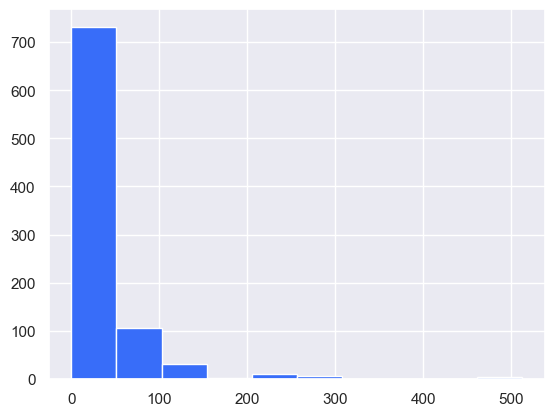

In [17]:
plt.hist(titanic['Fare'])

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

data = sc.fit_transform(titanic[['Fare','Age']])
data

array([[-0.50244517, -0.5924806 ],
       [ 0.78684529,  0.63878901],
       [-0.48885426, -0.2846632 ],
       ...,
       [-0.17626324,  0.        ],
       [-0.04438104, -0.2846632 ],
       [-0.49237783,  0.17706291]])

In [13]:
titanic_df = pd.DataFrame(data,columns=['Fare','Age'])
titanic_df.head()

,Fare,Age
0,-0.502445,-0.592481
1,0.786845,0.638789
2,-0.488854,-0.284663
3,0.420730,0.407926
4,-0.486337,0.407926


In [15]:
titanic_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Fare,891.0,0.0,1.0,-0.65,-0.49,-0.36,-0.02,9.67
Age,891.0,0.0,1.0,-2.25,-0.59,0.00,0.41,3.87


(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([-0.64842165,  0.38313716,  1.41469598,  2.4462548 ,  3.47781362,
         4.50937244,  5.54093125,  6.57249007,  7.60404889,  8.63560771,
         9.66716653]),
 <BarContainer object of 10 artists>)

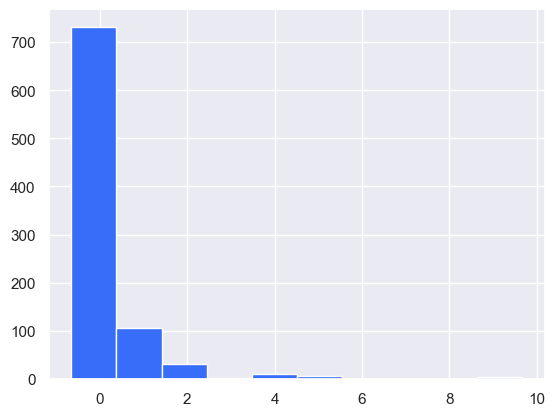

In [18]:
plt.hist(titanic_df['Fare'])

Text(0.5, 1.0, 'Scatter plot after standardization')

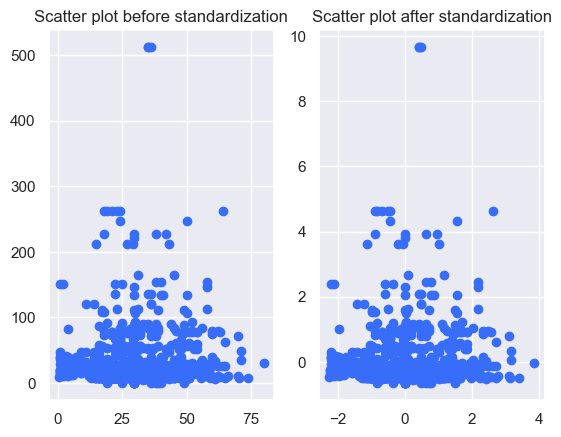

In [19]:
plt.subplot(121)
plt.scatter(titanic['Age'],titanic['Fare'])
plt.title("Scatter plot before standardization")

plt.subplot(122)
plt.scatter(titanic_df['Age'],titanic_df['Fare'])
plt.title("Scatter plot after standardization")

## Normalization
`making value from 0 to 1`

## Min - Max Scaling
 ### $x_{scaled}$ = (x - $x_{min}$)/($x_{max}$ - $x_{min}$)

In [24]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
titanic_df = pd.DataFrame(mm.fit_transform(titanic[['Fare','Age']]),columns=['Fare','Age'])
titanic_df

,Fare,Age
0,0.014151,0.271174
1,0.139136,0.472229
2,0.015469,0.321438
3,0.103644,0.434531
4,0.015713,0.434531
...,...,...
886,0.025374,0.334004
887,0.058556,0.233476
888,0.045771,0.367921
889,0.058556,0.321438


In [27]:
titanic_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Fare,891.0,0.06,0.10,0.0,0.02,0.03,0.06,1.0
Age,891.0,0.37,0.16,0.0,0.27,0.37,0.43,1.0


In [29]:
startups = pd.read_csv("../dataset/50_Startups.csv")
startups.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


In [31]:
startups.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [37]:
features_startups = startups.drop(columns=['Profit','State'])
features_startups.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [39]:
scaled_featured = pd.DataFrame(sc.fit_transform(features_startups),columns=features_startups.columns)
scaled_featured.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,-0.0,1.01,-1.62,-0.74,-0.01,0.61,2.02
Administration,50.0,-0.0,1.01,-2.53,-0.64,0.05,0.85,2.21
Marketing Spend,50.0,-0.0,1.01,-1.74,-0.68,0.01,0.73,2.15


In [40]:
scaled_featured = pd.DataFrame(mm.fit_transform(features_startups),columns=features_startups.columns)
scaled_featured.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,0.45,0.28,0.0,0.24,0.44,0.61,1.0
Administration,50.0,0.53,0.21,0.0,0.40,0.54,0.71,1.0
Marketing Spend,50.0,0.45,0.26,0.0,0.27,0.45,0.63,1.0


## 06/10/23 - Handling outliers

In [9]:
titanic = pd.read_csv('../dataset/titanic_dataset.csv')
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
titanic['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

C:\Users\adity\AppData\Local\Temp\ipykernel_12536\2540774120.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic.Age.dropna())


<Axes: xlabel='Age', ylabel='Density'>

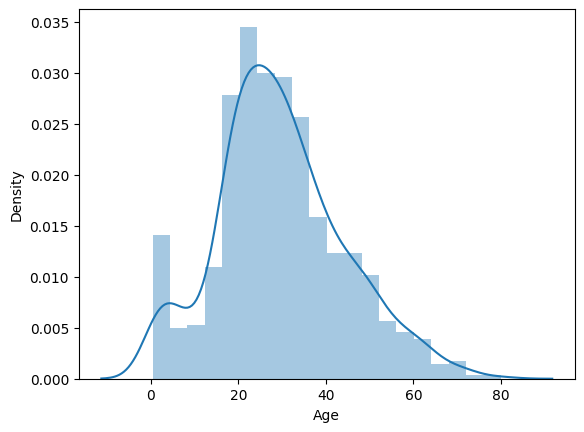

In [17]:
sns.distplot(titanic.Age.dropna())

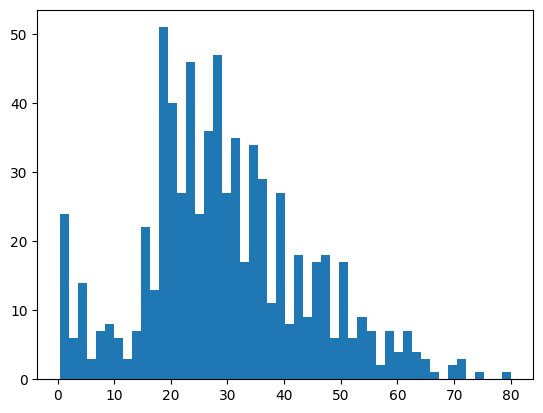

In [22]:
plt.hist(titanic.Age,bins=50)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x23179884f40>,
 'caps': [<matplotlib.lines.Line2D at 0x23179885480>,
 'boxes': [<matplotlib.lines.Line2D at 0x23179884ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x231798859c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23179885c60>],
 'means': []}

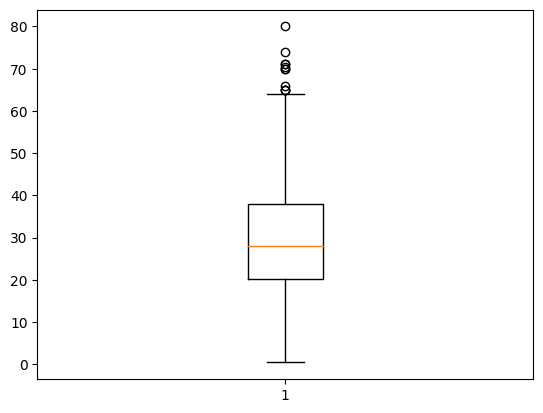

In [29]:
plt.boxplot(titanic['Age'].dropna())

In [31]:
titanic['Age'].describe().round(2).T

count    714.00
mean      29.70
std       14.53
min        0.42
25%       20.12
50%       28.00
75%       38.00
max       80.00
Name: Age, dtype: float64

## Detecting Outliers using Z-Score
`Used for normally distributed data`

In [38]:
upper_bound = titanic['Age'].mean() + 1.5*titanic['Age'].std()
lower_bound = titanic['Age'].mean() - 1.5*titanic['Age'].std()
meanage = titanic['Age'].mean()
print("Lower bound : ",lower_bound)
print("Upper bound : ",upper_bound)
print("Average of age : ",meanage)

Lower bound :  7.909371648557759
Upper bound :  51.48886364555988
Average of age :  29.69911764705882


In [42]:
# if normally distributed
upp_fence = titanic['Age'].mean() + 3*titanic['Age'].std()
low_fence = titanic['Age'].mean() - 3*titanic['Age'].std()

print("Upper Fence : ",upp_fence)
print("Lower Fence : ",low_fence)

Upper Fence :  73.27860964406094
Lower Fence :  -13.880374349943303


## locating outliers(here above 73)

In [58]:
no_outliers = titanic[~(titanic['Age']>=73)]
no_outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


{'whiskers': [<matplotlib.lines.Line2D at 0x2317bf88e50>,
 'caps': [<matplotlib.lines.Line2D at 0x2317bf89390>,
 'boxes': [<matplotlib.lines.Line2D at 0x2317bf88bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x2317bf898d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2317bf89b70>],
 'means': []}

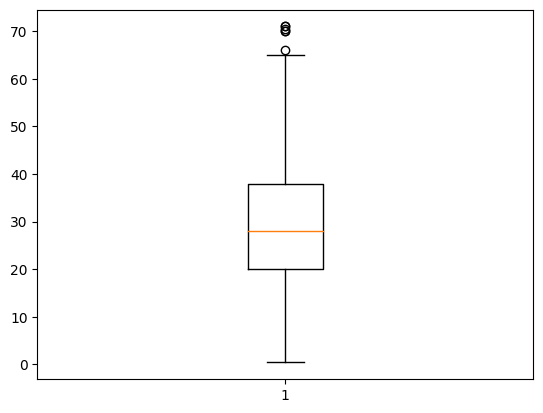

In [65]:
plt.boxplot(no_outliers['Age'].dropna())

In [67]:
fare = titanic['Fare']
fare

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2317c04b910>,
 'caps': [<matplotlib.lines.Line2D at 0x2317c04bd30>,
 'boxes': [<matplotlib.lines.Line2D at 0x2317c04b670>],
 'medians': [<matplotlib.lines.Line2D at 0x2317c0882b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2317c088550>],
 'means': []}

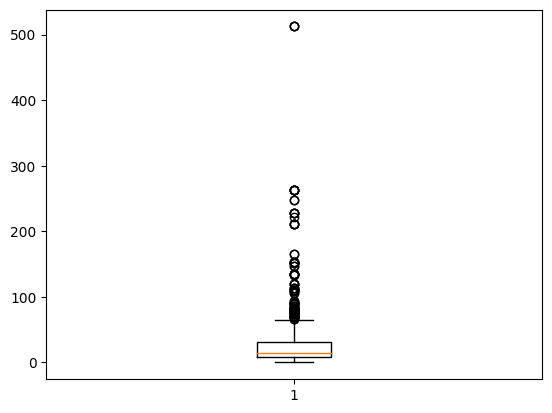

In [70]:
plt.boxplot(fare)

C:\Users\adity\AppData\Local\Temp\ipykernel_12536\3047559500.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fare)


<Axes: xlabel='Fare', ylabel='Density'>

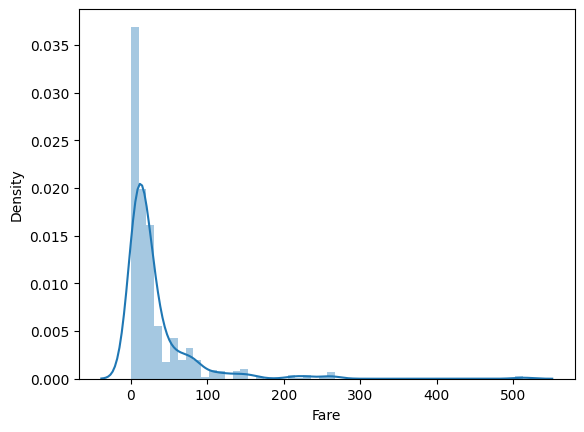

In [72]:
sns.distplot(fare)

In [91]:
upper_bound = titanic['Fare'].mean() + 3*titanic['Fare'].std()
lower_bound = titanic['Fare'].mean() - 3*titanic['Fare'].std()
meanFare = titanic['Fare'].mean()
print("Lower bound : ",lower_bound)
print("Upper bound : ",upper_bound)
print("Average of age : ",meanage)

Lower bound :  -116.87607782296804
Upper bound :  181.2844937601173
Average of age :  29.69911764705882


In [92]:
no_outliers = titanic[~(titanic['Fare']>=181)]
no_outliers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


{'whiskers': [<matplotlib.lines.Line2D at 0x2317deb6f20>,
 'caps': [<matplotlib.lines.Line2D at 0x2317deb7460>,
 'boxes': [<matplotlib.lines.Line2D at 0x2317deb6c80>],
 'medians': [<matplotlib.lines.Line2D at 0x2317deb79a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2317deb7c40>],
 'means': []}

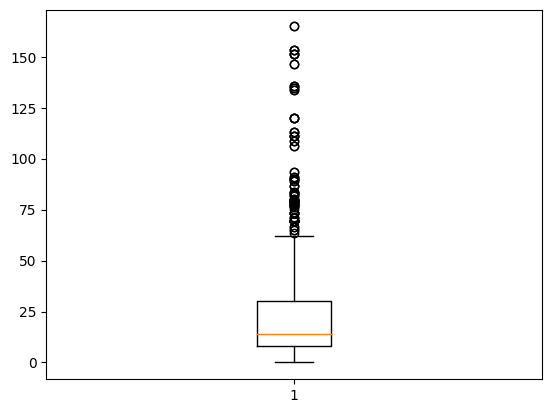

In [93]:
plt.boxplot(no_outliers['Fare'])

C:\Users\adity\AppData\Local\Temp\ipykernel_12536\3569107069.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(no_outliers['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

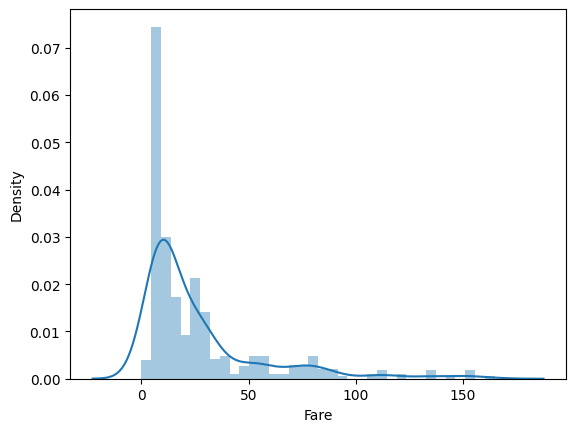

In [94]:
sns.distplot(no_outliers['Fare'])

(array([494., 188.,  45.,  48.,  45.,  18.,  11.,   4.,   9.,   9.]),
 array([  0.     ,  16.48667,  32.97334,  49.46001,  65.94668,  82.43335,
         98.92002, 115.40669, 131.89336, 148.38003, 164.8667 ]),
 <BarContainer object of 10 artists>)

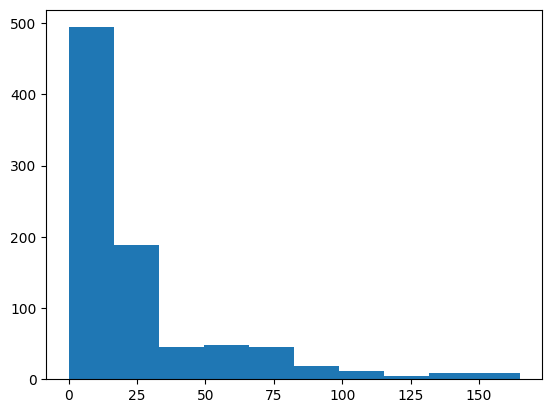

In [95]:
plt.hist(no_outliers['Fare'])

## Detecting Outliers using IQR

`Criteria : data points that lie 1.5*IQR above Q3 and below Q1`<br>
`Used for skewed data`

In [98]:
Q1 = titanic['Age'].quantile(0.25)
Q3 = titanic['Age'].quantile(0.75)
IQR = Q3 - Q1
print("The lower quartile of Age is: ", Q1)#round to two decimal places
print("The upper quartile of Age is:", Q3)#round to two decimal places
print('The interquartile range of age is:', IQR)#interquartile range

The lower quartile of Age is:  20.125 2
The upper quartile of Age is: 38.0
The interquartile range of age is: 17.875


In [102]:
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR
print(f"Lower bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

Lower bound: -6.6875
Upper Bound: 64.8125


In [104]:
no_outliers = titanic[~(titanic['Age']>=upper_bound)]
no_outliers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


{'whiskers': [<matplotlib.lines.Line2D at 0x2317e000610>,
 'caps': [<matplotlib.lines.Line2D at 0x2317e000b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2317e000370>],
 'medians': [<matplotlib.lines.Line2D at 0x2317e001090>],
 'fliers': [<matplotlib.lines.Line2D at 0x2317e0012d0>],
 'means': []}

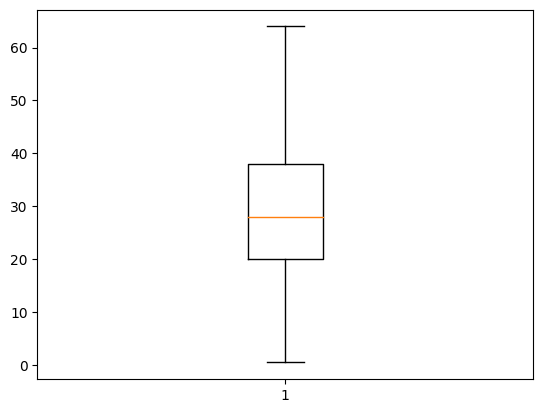

In [106]:
plt.boxplot(no_outliers['Age'].dropna())

## Capping

In [112]:
titanic['Age'] = np.where(titanic['Age']>=upper_bound,
    upper_bound,
    #np.where(data.Age>=lower_bound,
    # lower_bound,
    # data.Age)
    titanic['Age'])

In [113]:
titanic['Age'].describe().round(2).T

count    714.00
mean      29.62
std       14.32
min        0.42
25%       20.12
50%       28.00
75%       38.00
max       64.81
Name: Age, dtype: float64